In [25]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Classification

In [2]:
(train_images, train_labels), (test_images,
                               test_labels) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


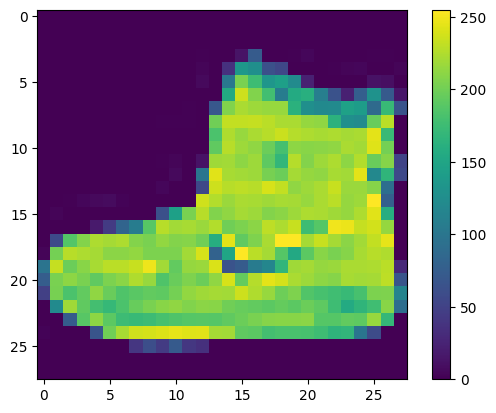

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0


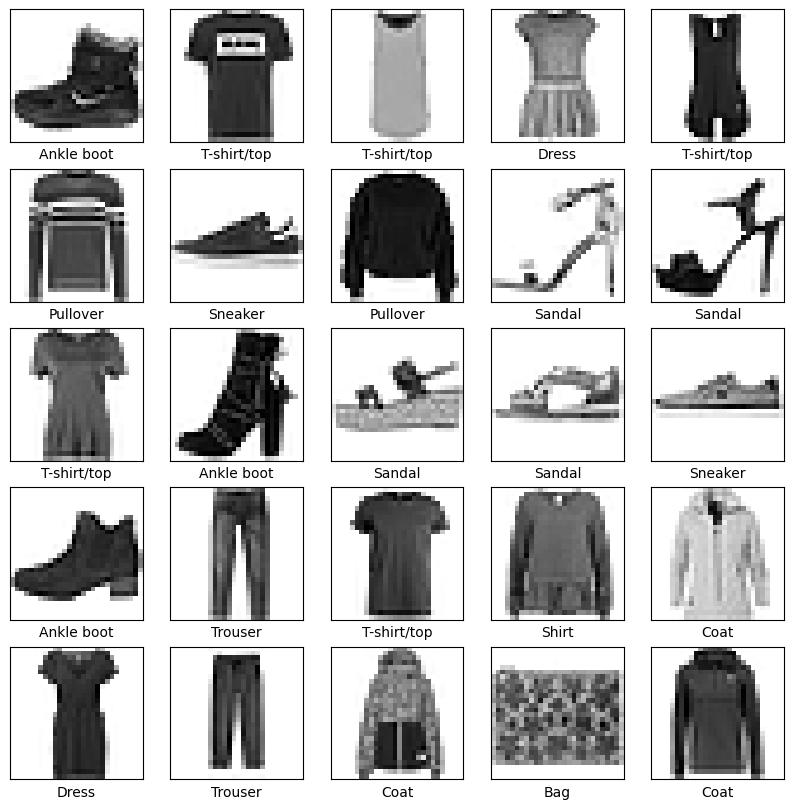

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [6]:
sequential_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

sequential_model.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(
                             from_logits=True),
                         metrics=['accuracy'])


In [7]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)


In [8]:
sequential_model.fit(train_images, train_labels, epochs=10,
                     callbacks=[tensorboard_callback])


Epoch 1/10
1875/1875 [==============================] - 2s 981us/step - loss: 0.4966 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 2s 942us/step - loss: 0.3732 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 2s 941us/step - loss: 0.3336 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 2s 957us/step - loss: 0.3126 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 2s 958us/step - loss: 0.2964 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 2s 951us/step - loss: 0.2828 - accuracy: 0.8941
Epoch 7/10
1875/1875 [==============================] - 2s 943us/step - loss: 0.2697 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 2s 955us/step - loss: 0.2591 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 2s 944us/step - loss: 0.2497 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 2s 936u

In [9]:
%tensorboard --logdir logs/fit

In [10]:
test_loss, test_acc = sequential_model.evaluate(
    test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3384 - accuracy: 0.8823 - 218ms/epoch - 695us/step

Test accuracy: 0.8823000192642212


In [11]:
probability_model = tf.keras.Sequential([sequential_model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

print(predictions[0])


313/313 [==============================] - 0s 514us/step
[1.3621237e-08 4.8529192e-10 2.6893883e-09 1.0237682e-08 8.7680014e-09
 6.5055164e-03 1.4966174e-07 6.0797404e-03 2.6101233e-08 9.8741454e-01]


In [12]:
np.argmax(predictions[0])


9

In [13]:
test_labels[0]


9

In [14]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


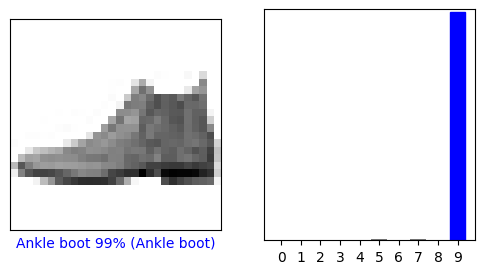

In [15]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


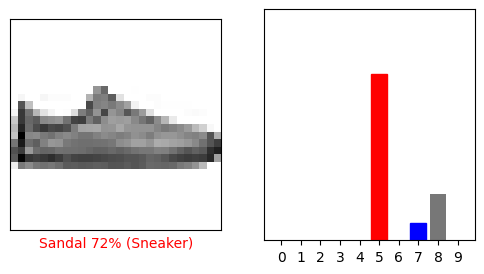

In [16]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


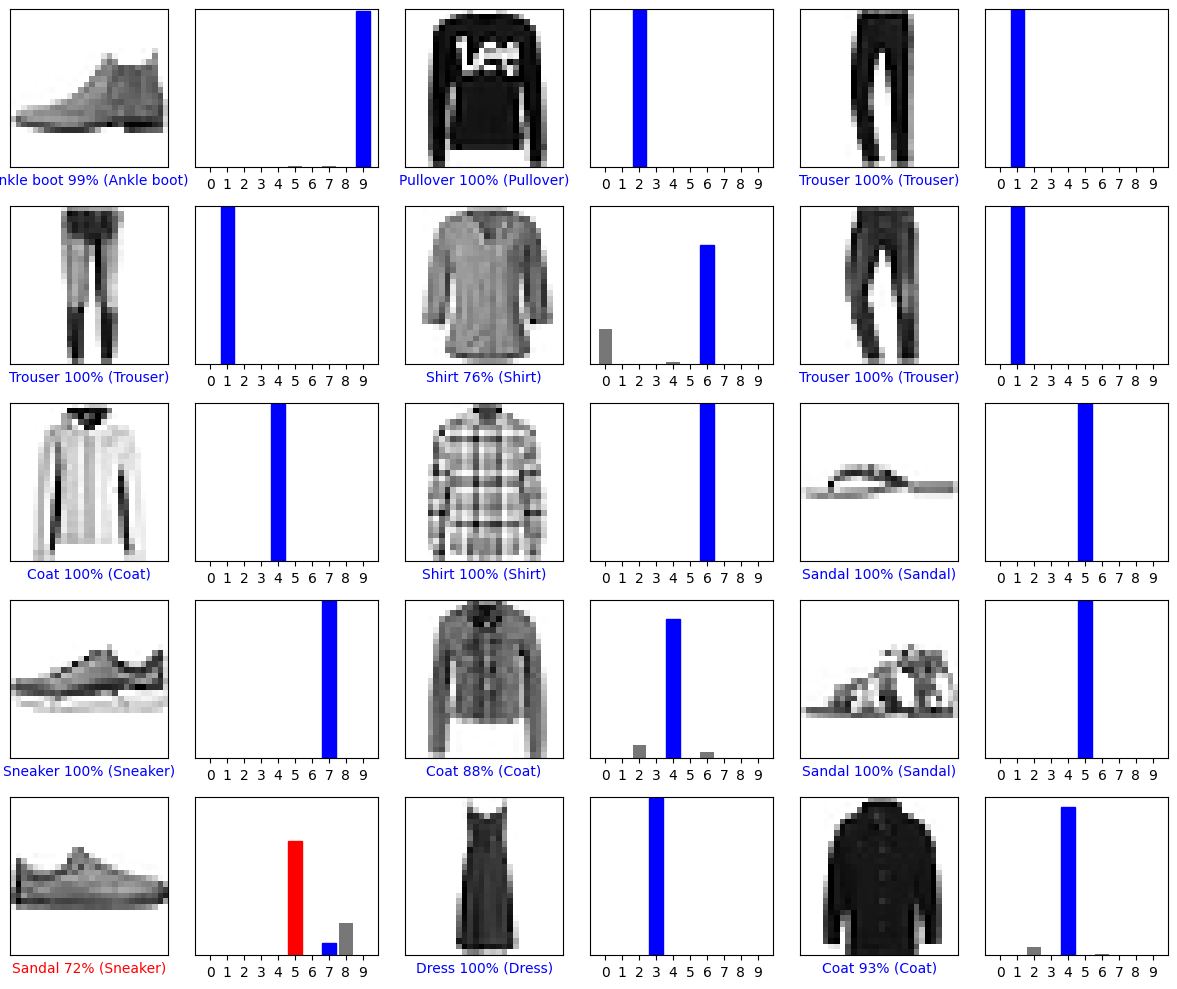

In [17]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [18]:
img = test_images[1]

print(img.shape)


(28, 28)


In [19]:
img = (np.expand_dims(img, 0))

print(img.shape)


(1, 28, 28)


In [20]:
predictions_single = probability_model.predict(img)

print(predictions_single)


1/1 [==============================] - 0s 9ms/step
[[1.8800576e-05 5.5548099e-14 9.9739337e-01 9.2913221e-12 1.3996855e-03
  6.9020614e-13 1.1881451e-03 1.4031268e-21 2.9316663e-10 1.4932884e-16]]


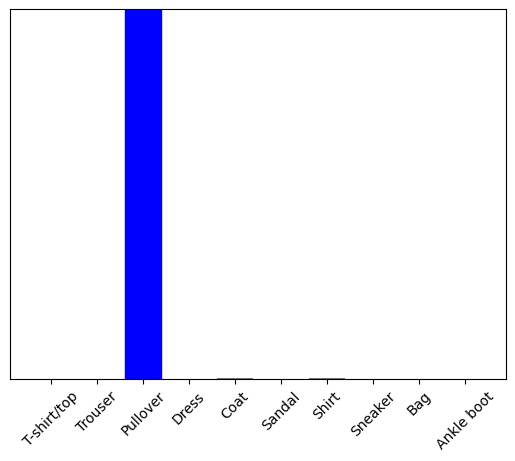

In [21]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [22]:
np.argmax(predictions_single[0])

2

# Regression

In [24]:
np.set_printoptions(precision=3, suppress=True)

In [76]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)


In [77]:
dataset = raw_dataset.copy()
dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [78]:
dataset.isna().sum()


MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [79]:
dataset = dataset.dropna()


In [80]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


In [81]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720.0,19.4,82,False,False,True


In [82]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)


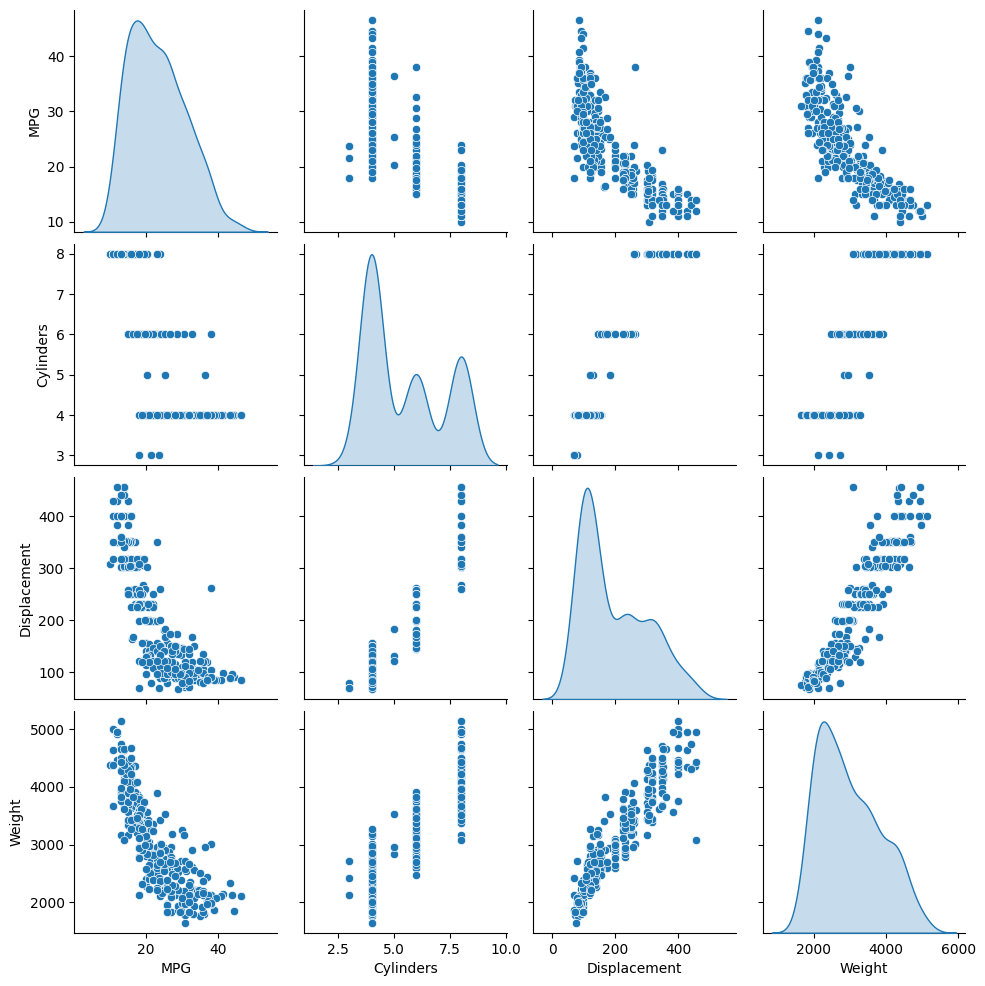

In [83]:
sns.pairplot(
    train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')


In [84]:
train_dataset.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [85]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')


In [86]:
train_dataset.describe().transpose()[['mean', 'std']]


,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642


In [87]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features).astype(np.float32))
print(normalizer.mean.numpy())


[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [88]:
first = np.array(train_features[:1]).astype(np.float32)

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())


First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [107]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1, ], axis=None)
horsepower_normalizer.adapt(horsepower)

horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_11 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [108]:
horsepower_model.predict(horsepower[:10])


1/1 [==============================] - 0s 24ms/step


array([[ 1.331],
       [ 0.752],
       [-2.457],
       [ 1.866],
       [ 1.688],
       [ 0.663],
       [ 2.   ],
       [ 1.688],
       [ 0.44 ],
       [ 0.752]], dtype=float32)

In [109]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [110]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0)


UnknownError: Graph execution error:

KeyError: '[32, 275, 31, 9, 185, 43, 71] not in index'
Traceback (most recent call last):

  File "c:\Program Files\Python310\lib\site-packages\tensorflow\python\ops\script_ops.py", line 265, in __call__
    return func(device, token, args)

  File "c:\Program Files\Python310\lib\site-packages\tensorflow\python\ops\script_ops.py", line 143, in __call__
    outputs = self._call(device, args)

  File "c:\Program Files\Python310\lib\site-packages\tensorflow\python\ops\script_ops.py", line 150, in _call
    ret = self._func(*args)

  File "c:\Program Files\Python310\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "c:\Program Files\Python310\lib\site-packages\keras\engine\data_adapter.py", line 512, in py_method
    return [slice_array(inp) for inp in flat_inputs]

  File "c:\Program Files\Python310\lib\site-packages\keras\engine\data_adapter.py", line 512, in <listcomp>
    return [slice_array(inp) for inp in flat_inputs]

  File "c:\Program Files\Python310\lib\site-packages\keras\engine\data_adapter.py", line 508, in slice_array
    return training_utils.slice_arrays(

  File "c:\Program Files\Python310\lib\site-packages\keras\engine\training_utils.py", line 52, in slice_arrays
    slices = generic_utils.slice_arrays(arrays, indices)

  File "c:\Program Files\Python310\lib\site-packages\keras\utils\generic_utils.py", line 444, in slice_arrays
    return [None if x is None else x[start] for x in arrays]

  File "c:\Program Files\Python310\lib\site-packages\keras\utils\generic_utils.py", line 444, in <listcomp>
    return [None if x is None else x[start] for x in arrays]

  File "c:\Program Files\Python310\lib\site-packages\pandas\core\series.py", line 1038, in __getitem__
    return self._get_with(key)

  File "c:\Program Files\Python310\lib\site-packages\pandas\core\series.py", line 1073, in _get_with
    return self.loc[key]

  File "c:\Program Files\Python310\lib\site-packages\pandas\core\indexing.py", line 1103, in __getitem__
    return self._getitem_axis(maybe_callable, axis=axis)

  File "c:\Program Files\Python310\lib\site-packages\pandas\core\indexing.py", line 1332, in _getitem_axis
    return self._getitem_iterable(key, axis=axis)

  File "c:\Program Files\Python310\lib\site-packages\pandas\core\indexing.py", line 1272, in _getitem_iterable
    keyarr, indexer = self._get_listlike_indexer(key, axis)

  File "c:\Program Files\Python310\lib\site-packages\pandas\core\indexing.py", line 1462, in _get_listlike_indexer
    keyarr, indexer = ax._get_indexer_strict(key, axis_name)

  File "c:\Program Files\Python310\lib\site-packages\pandas\core\indexes\base.py", line 5876, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)

  File "c:\Program Files\Python310\lib\site-packages\pandas\core\indexes\base.py", line 5938, in _raise_if_missing
    raise KeyError(f"{not_found} not in index")

KeyError: '[32, 275, 31, 9, 185, 43, 71] not in index'


	 [[{{node EagerPyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_129008]

In [97]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


NameError: name 'history' is not defined